<h1><center> MATH 472/572 Computational Statistics - Spring 2020 </h1></center>
<h2><center> Homework 2 - Due January 30, Thursday </h2></center>
<h3><center> Instructor: Leming Qu </h3></center>

<h1><center> Student: Arash Modaresi Rad </h1></center>

## Coding Assignments:

**(1)** Write a Python script that implements the Newtons method in Example 2.2 on page 27 and
produces Figure 2.3 of the Computation Statistics book

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import functools as fts
np.random.seed(1000)

Define the stating point:

In [2]:
Start = 3

Define the function:

In [3]:
def Func(x):
    return (np.log(x)) / (1 + x)

Define the first derivative function:

In [4]:
def derivative(x):
    return (1 + (1 / x) - np.log(x)) / ((1 + x) ** 2)

Define the second derivative function:

In [5]:
def derivative2(x):
    return (-3 - (4 / x) - (1 / (x ** 2)) + (2 * np.log(x))) / ((1 + x) ** 3)

Define the `negative` Newton increment for this problem (based on Eq 2.12):

In [6]:
def Step_Size(x):
    return ((x + 1) * (1 + (1 / x) - np.log(x))) / (3 + (4 / x) + (1 / (x ** 2)) - (2 * np.log(x)))

In [7]:
itt = 0
i = 0
eps = 0.000000001
xt = Start
xt_list = []
et_list = []
for i in range(10000):
    xt0 = xt
    xt = xt0 + Step_Size(xt0)
    error_criterion = np.absolute(xt - xt0)
    itt = itt + 1
    xt_list.append(xt0)
    et_list.append(error_criterion)
    if error_criterion < eps:
        print('Solution found based on error criterion: ' + str(xt))
        print('Itteration: ' + str(itt))
        break
    elif itt == 10000:
        print("The maximum number of itterations reached!") 
    


Solution found based on error criterion: 3.591121476668622
Itteration: 6


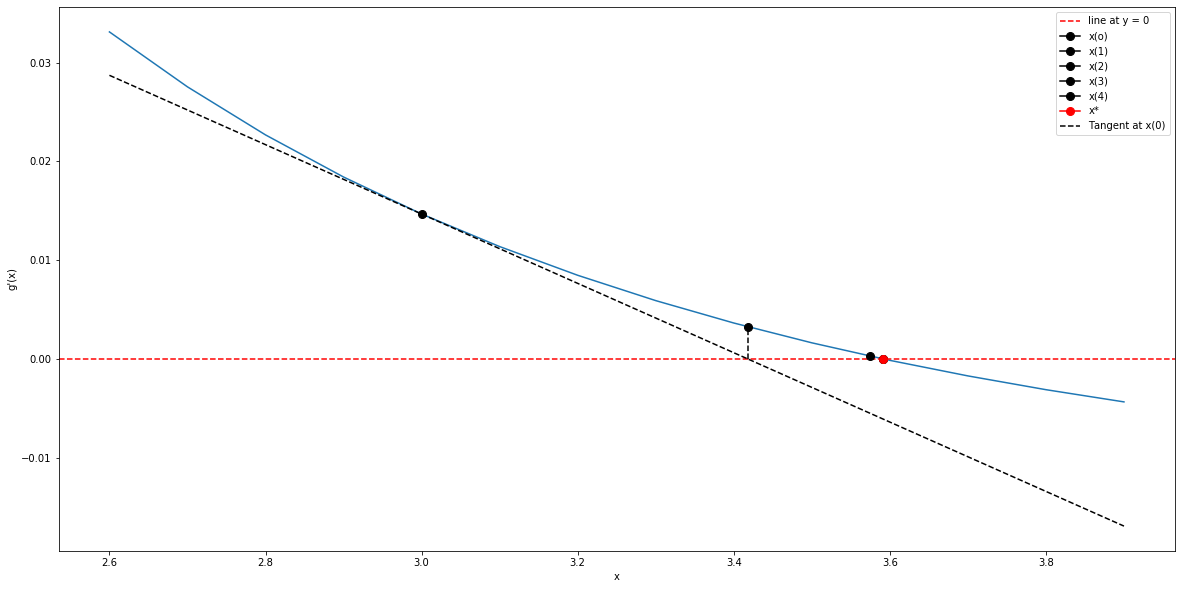

In [8]:
def PlotFigure(formula, ylabel):
    plt.figure(figsize=(20,10))
    x = np.arange(2.6, 4, 0.1, 'float')  
    y = eval(formula) 
    plt.plot(x, y) 
    plt.axhline(y=0, color='r', label='line at y = {}'.format(0), linestyle='--')
    plt.plot([xt_list[0]], [derivative(xt_list[0])], label='x(o)', marker='o', markersize=8, color="k")
    plt.plot([xt_list[1]], [derivative(xt_list[1])], label='x(1)', marker='o', markersize=8, color="k")
    plt.plot([xt_list[2]], [derivative(xt_list[2])], label='x(2)', marker='o', markersize=8, color="k")
    plt.plot([xt_list[3]], [derivative(xt_list[3])], label='x(3)', marker='o', markersize=8, color="k")
    plt.plot([xt_list[4]], [derivative(xt_list[4])], label='x(4)', marker='o', markersize=8, color="k")
    plt.plot([xt], [derivative(xt)], label='x*', marker='o', markersize=8, color="r")
    tan = derivative2(Start) * (x - Start) + derivative(Start)
    plt.plot(x, tan, 'k--', label='Tangent at x(0)')
    x1 = np.arange(0, derivative(xt_list[1]), 0.0001, 'float')
    plt.plot([xt_list[1]] * len(x1), x1, 'k--')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel(ylabel)
    plt.show()
PlotFigure('(1 + (1 / x) - np.log(x)) / ((1 + x) ** 2)', "g'(x)")

**(2)** Problem 2.2 on page 54 of the Computation Statistics book.

2.2) Consider the density f(x) = [1 − cos{x − θ}]/2π on 0 ≤ x ≤ 2π, where θ is a parameter between −π and π. The following i.i.d. data arise from this density: 3.91, 4.85,
2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99,
2.54, 0.52, 2.50. We wish to estimate θ.

**Solution:**

`a. Graph the log likelihood function between −π and π.`

the likelihood function is

\begin{equation*}
L(\theta) = \prod_{i=1}^{n}\frac{1}{2\pi} \left( 1 - \cos(x - \theta) \right) = \frac{1}{\left( 2\pi \right) ^ n} \prod_{i=1}^{n} \left( 1-\cos(x-\theta) \right)
\end{equation*}

the loglikelihood function

\begin{equation*}
l(\theta) = \log(1) - n\log(2\pi) + \sum_{i=1}^{n} \log(1-\cos(x-\theta)) \simeq \sum_{i=1}^{n} \log(1-\cos(x-\theta))
\end{equation*}

plot the loglikelihood function:

Text(0, 0.5, '$\\log L(\\theta)$')

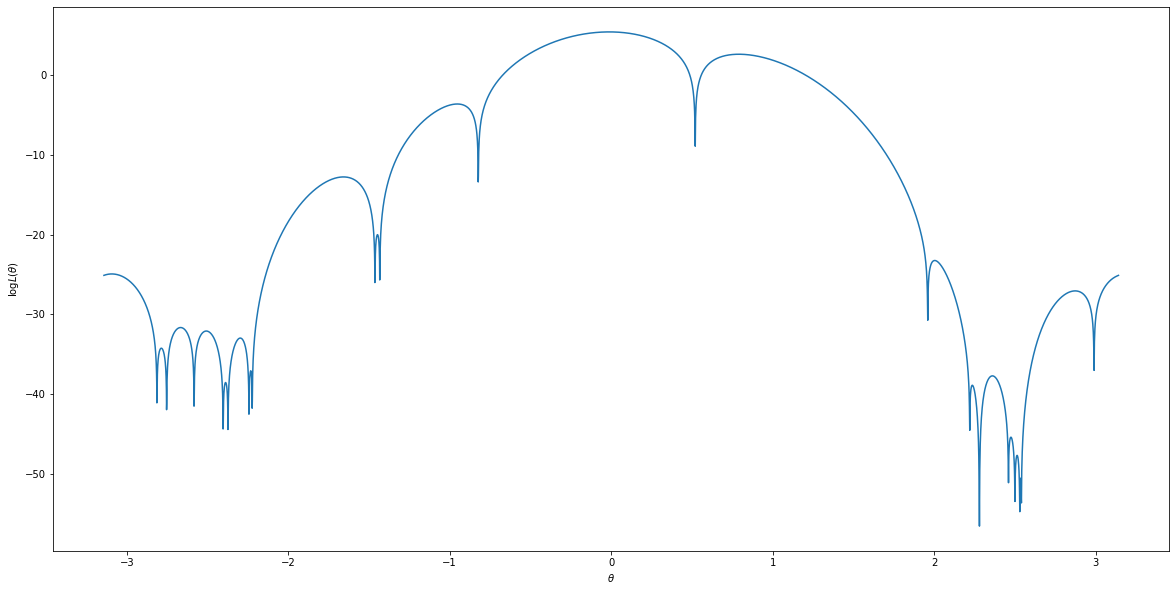

In [9]:
x = [3.91, 4.85, 2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52, 2.50]
TtList = []
def loglikFunc(tt): 
    for i in range(len(tt)):
        Ttot = 0 
        for j in range(len(x)):
            Ttot += np.log(1-np.cos(x[j]-tt[i]))
        TtList.append(Ttot)    
    return TtList 

t = np.arange(-np.pi, np.pi, 0.001, 'float')
l = loglikFunc(t)
plt.figure(figsize=(20,10))
plt.plot(t, l)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\log L(\theta)$')

`b. Find the method-of-moments estimator of θ.`


by setting the mean equal to the sample mean we can find θ:

\begin{equation*}
\mu(\theta) = \frac{1}{2\pi} \int_{0}^{2\pi} x\left( 1 - \cos(x - \theta) \right)dx = \pi - \frac{1}{2\pi} \int_{0}^{2\pi} x\cos(x-\theta)dx
\end{equation*}

\begin{equation*}
\mu(\theta) =  \pi - \frac{1}{2\pi} \left( 
\sin(x-\theta)\Big|_{0}^{2\pi} - \int_{0}^{2\pi} \sin(x-\theta)dx = 2\pi\sin(2\pi-\theta) \right) = \pi-\sin(\theta)
\end{equation*}

\begin{equation*}
\mu(\theta) = \pi-\sin(\theta) = \bar{x}
\end{equation*}

\begin{equation*}
\theta =  \arcsin(\pi - \bar{x}) 
\end{equation*}

In [10]:
def Average(lst): 
    return fts.reduce(lambda a, b: a + b, lst) / len(lst) 

X_bar = Average(x)
print('\bar(X) = {}'.format(X_bar))

ar(X) = 3.2


In [11]:
print('theta = {}'.format(np.arcsin(np.pi - X_bar)))

theta = -0.05844060614042408


Which seems reasonably currect accroding to figure drawn in part a

`c. Find the MLE for θ using the Newton–Raphson method, using the result from
(b) as the starting value. What solutions do you find when you start at −2.7
and 2.7?`


the likelihood function is

\begin{equation*}
l(\theta) = \sum_{i=1}^{n} \log(1-\cos(x-\theta))
\end{equation*}

\begin{equation*}
l'(\theta) = -\sum_{i=1}^{n} \frac{\sin(x_i-\theta)}{1-\cos(x_i-\theta)}
\end{equation*}

\begin{equation*}
l"(\theta) = -\sum_{i=1}^{n} \frac{1}{1-\cos(x_i-\theta)}
\end{equation*}

If we start our search from initial point resulted in part b we have:

In [12]:
Start = np.arcsin(np.pi - X_bar)

Define the likelihood function:

Define the first derivative likelihood function:

In [13]:
x = [3.91, 4.85, 2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52, 2.50]
def D1loglikFunc(tt): 
    Ttot = 0 
    for j in range(len(x)):
        Ttot += -np.sin(x[j]-tt)/(1-np.cos(x[j]-tt))     
    return Ttot 

Define the second derivative likelihood function:

In [14]:
x = [3.91, 4.85, 2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52, 2.50]
def D2loglikFunc(tt): 
    Ttot = 0 
    for j in range(len(x)):
        Ttot += -1/(1-np.cos(x[j]-tt))     
    return Ttot 

Define the `negative` Newton increment for this problem:

In [15]:
def Step_Size2(tt):
    return -D1loglikFunc(tt) / D2loglikFunc(tt)

In [16]:
def NR(Start):
    itt = 0
    i = 0
    eps = 0.000000001
    xt = Start
    xt_list = []
    et_list = []
    for i in range(10000):
        xt0 = xt
        xt = xt0 + Step_Size2(xt0)
        error_criterion = np.absolute(xt - xt0)
        itt = itt + 1
        xt_list.append(xt0)
        et_list.append(error_criterion)
        if error_criterion < eps:
            print('Solution found based on error criterion: ' + str(xt))
            print('Itteration: ' + str(itt))
            break
        elif itt == 10000:
            print("The maximum number of itterations reached!") 

In [17]:
NR(np.arcsin(np.pi - X_bar))

Solution found based on error criterion: -0.011972002287440001
Itteration: 4


If we start our search from initial point  +2.7 we have:

In [18]:
NR(2.7)

Solution found based on error criterion: 2.8730945142450777
Itteration: 6


If we start our search from initial point -2.7 b we have:

In [19]:
NR(-2.7)

Solution found based on error criterion: -2.666699926100948
Itteration: 5


`d. Repeat part (c) using 200 equally spaced starting values between−π andπ. Partition
the interval between −π and π into sets of attraction. In other words, divide the set
of starting values into separate groups, with each group corresponding to a separate
unique outcome of the optimization (a local mode). Discuss your results.`


create 200 equally spaced starting values between −π and π:

In [20]:
t200 = np.arange(-np.pi, np.pi, np.pi*2/200, 'float')

In [21]:
def NR2(Start):
    itt = 0
    i = 0
    eps = 0.000000001
    xt = Start
    xt_list = []
    et_list = []
    for i in range(10000):
        xt0 = xt
        xt = xt0 + Step_Size2(xt0)
        error_criterion = np.absolute(xt - xt0)
        itt = itt + 1
        xt_list.append(xt0)
        et_list.append(error_criterion)
        if error_criterion < eps:
            return xt
            
        elif itt == 10000:
            print("The maximum number of itterations reached!") 

In [22]:
NR_list = list(map(lambda Start: NR2(Start), t200))
NR_dataframe = pd.DataFrame(NR_list)
NR_dataframe.nunique()

0    99
dtype: int64

According to the results it appears that there are many local minimums but according the the figure in part a there is only one global minimum. It also shows that depending on where the starting point for the search in Newton–Raphson method is, there exists a local minimum in its neighborhood and the Newton–Raphson method converges to that point.   

`e. Find two starting values, as nearly equal as you can, for which the Newton–Raphson
method converges to two different solutions.`

In [23]:
NR_dataframe['start'] = t200
NR_dataframe.columns.values[0] = "Theta"
NR_dataframe.head(20)

,Theta,start
0,-3.093092,-3.141593
1,-3.093092,-3.110177
2,-3.093092,-3.078761
3,-3.093092,-3.047345
4,-3.093092,-3.015929
5,-3.093092,-2.984513
6,-3.093092,-2.953097
7,-3.093092,-2.921681
8,-3.093092,-2.890265
9,-3.093092,-2.858849


It appears that rows 10 and 11 are close enough but with large difference in etimated $\theta$ so we can have two different solutions with Newton–Raphson method with the following values:

In [24]:
NR(-2.83)

Solution found based on error criterion: -3.093091729911945
Itteration: 8


In [25]:
NR(-2.8)

Solution found based on error criterion: -2.7861667516045996
Itteration: 5


These two values are very close to one another (-2.8 & -2.83) but as shown above these two converge to diffrent solutions.

## Non-Coding Assignments:

**(3)** Let X1,...,Xn be a random sample from the Bernoulli(p) distribution. Find the Fisher information I(p).

\begin{equation*}
f(x) =  p^{x}(1-p)^{1-x}
\end{equation*}

\begin{equation*}
E(x) = p ,  Var(x) = p(1-p)
\end{equation*}

\begin{equation*}
L(p) = \prod_{i=1}^{n} f(x_i|p) = \prod_{i=1}^{n} p^{x_i}(1-p)^{1-x_i} 
\end{equation*}

\begin{equation*}
l(p) = \sum_{i=1}^{n} [x_i(\log p) + (1-x_i)\log(1-p)] = \sum_{i=1}^{n} [x_i] \log p + (n-\sum_{i=1}^{n} [x_i])\log(1-p)
\end{equation*}

\begin{equation*}
\frac{\sigma l(p)}{\sigma p} = \frac{\sum_{i=1}^{n} [x_i]}{p} - \frac{(n-\sum_{i=1}^{n} [x_i])}{1-p}
\end{equation*}

\begin{equation*}
\frac{\sigma^2 l(p)}{\sigma p^2} = -\frac{\sum_{i=1}^{n} [x_i]}{p^2} - \frac{(n-\sum_{i=1}^{n} [x_i])}{(1-p)^2}
\end{equation*}

\begin{equation*}
I(p) = -E[\frac{\sigma^2 l(p)}{\sigma p^2}] = \frac{E[\sum_{i=1}^{n} [x_i]]}{p^2} + \frac{(n-E[\sum_{i=1}^{n} [x_i]])}{(1-p)^2}
\end{equation*}

and since we know E(x) = p then we can write:

\begin{equation*}
I(p) = -E[\frac{\sigma^2 l(p)}{\sigma p^2}] = \frac{np}{p^2} + \frac{n-np}{(1-p)^2} = \frac{n}{p} + \frac{n}{(1-p)} = \frac{n}{p(1-p)}
\end{equation*}

**(4)** Let f(Xi; Yi)g; i = 1, ..., n be a random sample from the joint density f(x, y|θ) = exp{-(θx + y/θ)} ; x > 0; y > 0:
Find the Fisher information I(θ).

\begin{equation*}
L(p) = \prod_{i=1}^{n} f(x_i|p) = \prod_{i=1}^{n} \exp \{ -\left( \theta x_i + \frac{y_i}{\theta} \right) \} = \exp\{ \sum_{i=1}^{n} -\left( \theta x_i + \frac{y_i}{\theta} \right) \}
\end{equation*}

\begin{equation*}
l(p) = \sum_{i=1}^{n} -\left( \theta x_i + \frac{y_i}{\theta} \right) = -\theta \sum_{i=1}^{n} x_i -\frac{1}{\theta}\sum_{i=1}^{n} y_i
\end{equation*}

\begin{equation*}
l'(p) =  -\sum_{i=1}^{n} x_i + \frac{1}{\theta^2}\sum_{i=1}^{n} y_i
\end{equation*}

\begin{equation*}
l"(p) =  - \frac{2}{\theta^3}\sum_{i=1}^{n} y_i
\end{equation*}

\begin{equation*}
I(\theta) = -E[l"(p)] = -E[- \frac{2}{\theta^3}\sum_{i=1}^{n} y_i] =  \frac{2}{\theta^3}\sum_{i=1}^{n} E[y_i]
\end{equation*}

now we must compute the mean of y:

\begin{equation*}
E[y] = \int_{0}^{\infty} \int_{0}^{\infty} y \exp(-\left( \theta x_i + \frac{y_i}{\theta} \right)) dxdy = \int_{0}^{\infty} y\exp(-\frac{y}{\theta}).\frac{1}{\theta} dy = -\frac{\left(\frac{y}{\theta} + 1 \right)\exp(-\frac{y}{\theta})}{\frac{1}{\theta}}|_{0}^{\infty} = \theta
\end{equation*}

Therefore the fisher information can be written as:

\begin{equation*}
I(\theta) = -E[l"(p)] = \frac{2}{\theta^3}n\theta = \frac{2n}{\theta^2}
\end{equation*}